<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Statistical machine learning - Notebook 7, version for students
**Author: Michał Ciach**  


## Description
 

In today's class, we will learn the basics of parameter estimation in the Bayesian framework. In contrast to the frequentist approach that we've seen so far, the Bayesian one assumes that the unknown parameters (such as the mean of the data) are random variables. This is a useful approach to express the uncertainty of estimation.  

Formally, we assume that our data is a sample *conditional* on a parameter value, $X_1, \dots X_n | \theta$. If we know the value of $\theta$, we can write the probability density function of the data. In the context of Bayesian statistics, we refer to this function as the *likelihood*. For example, for a random sample from a normal distribution with an unknown mean $\mu$ and a known variance $\sigma^2$ we would write $X_1, \dots, X_n | \mu \sim \mathcal{N}(\mu, \sigma^2)$. The parameters $\theta$ have their own *prior* distribution that's independent on the data. For example, we may assume that $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$. The distribution of the parameters conditional on the data is called the *posterior distribution* and is the result of estimation in the Bayesian framework. In our example, it turns out that

$$ \mu | X_1, \dots, X_n \sim \mathcal{N}\left(\frac{\sigma^{-2}_0\mu_0 + \sigma^{-2}\sum X_i }{\sigma_0^{-2} + n\sigma^{-2}}, \frac{1}{\sigma_0^{-2} + n\sigma^{-2}}\right).$$ 

The expected value of the parameter under it's posterior distribution is the *Bayesian estimator* of this parameter. In our case, the Bayesian estimator of the mean is equal to $\frac{\sigma^{-2}_0\mu_0 + \sigma^{-2}\sum X_i }{\sigma_0^{-2} + n\sigma^{-2}}$. 

The probability distribution of a new data point conditioned on the observed data is called the *posterior predictive*. It's used to predict the values of new observations based on the data. Formally, it's equal to
$$p(\tilde{x} | x_1, \dots, x_n) = \int L(\tilde{x} | \theta) \pi (\theta | x_1, \dots, x_n) d\theta.$$
Basically, this is the likelihood function combined with the posterior distribution of $\theta$. It can be interpreted as a *fitted bayesian model* and used to roughly check whether we have specified our model correctly. However, it's usually broader than the observed distribution of the data, which reflects the uncertainty of prediction. In our case, the posterior predictive is 

$$\tilde{X} \sim \mathcal{N}(\mu_0', \sigma_0'^{2} + \sigma^2),$$  

where $\mu_0'$ and $\sigma_0'^2$ are the *posterior* mean and variance of $\mu$ (i.e. $\mu_0'$ is the Bayesian estimator of the mean).  

In general, we can set any distribution as the prior. However, there is a particularly useful type called a *conjugate prior*. Rougly speaking, this is the type of prior that we get if we treat the likelihood as a probability density function for the parameter. 

Here is an example of constructing a conjugate prior. If we have a simple observation $X_1 | \mu \sim \mathcal{N}(\mu, \sigma^2)$, the likelihood is equal to

$$L(x_1 | \mu, \sigma^2) = (2\pi\sigma^2)^{-\frac{1}{2}}\exp\left(-\frac{(x_1 - \mu)^2}{2\sigma^2}\right).$$
Now, we treat it as a function of $\mu$ and replace all other parameters with new ones. Let's replace $x_1$ with $\mu_0$ and $\sigma$ with $\sigma_0$. This gives us

$$\tilde{\pi}(\mu | \mu_0, \sigma_0) = (2\pi\sigma_0^2)^{-\frac{1}{2}}\exp\left(-\frac{(\mu_0 - \mu)^2}{2\sigma_0^2}\right).$$

This means that the conjugate prior for $X_1 | \mu \sim \mathcal{N}(\mu, \sigma^2)$, when $\sigma^2$ is known, is also a normal distribution $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$. If we have more data points, we do a similar procedure, but we need to remember to start from the *joint likelihood of the whole sample.*

Often, simply replacing parameters will give us a function that does not integrate to 1, i.e. is not a probability density. To get a conjugate prior in this case, we strip all factors that do not depend on $\mu$ from the likelihood, replace all the remaining parameters (including the data) with new ones, and read out what kind of distribution we get based on the parts that depend on $\mu$. In our example, the only part that depends on $\mu$ is $\exp(-(\mu-\mu_0)^2/(2\sigma_0^2))$, which means that this distribution is gaussian. 

The parameters of the prior distribution, in our case $\mu_0$ and $\sigma_0$, are assumed to be non-random. They're called the *hyperparameters* to distinguished them from the random ones. 



In [ ]:
# !pip install gdown
# !gdown https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
# !gdown https://drive.google.com/uc?id=1FInZ2jrlZGNColU4sHF9JKGHP39fTVut
# !gdown https://drive.google.com/uc?id=1n1qS6dcVVKcVJOuUIIm0VTz6cSyrtzDH

Downloading...
From: https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
To: /content/BDL municipality incomes 2015-2020.csv
100% 228k/228k [00:00<00:00, 82.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FInZ2jrlZGNColU4sHF9JKGHP39fTVut
To: /content/BDL municipality area km2 2015-2020.csv
100% 180k/180k [00:00<00:00, 65.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n1qS6dcVVKcVJOuUIIm0VTz6cSyrtzDH
To: /content/BDL municipality population 2015-2020.csv
100% 222k/222k [00:00<00:00, 32.1MB/s]


## Data & library imports

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, lognorm

In [2]:
income = pd.read_csv('BDL municipality incomes 2015-2020.csv', sep=';', dtype={'Code': 'str'})

## Part 1

In Notebook 2, we have encountered the *variance-bias tradeoff*, where a biased estimator (a geometric mean) gave better results compared to an unbiased one (an arithmentic mean), because it reduced the variance of the estimation. 

Bayesian statistics is another approach to deal with the variance-bias tradeoff. It allows us to limit both the bias and the variance of the estimator by setting an appropriate prior distribution.  

How do we set an appropriate prior and its hyperparameters? We guess. 
Usually we have some prior knowledge that we can use---for example, we know that the population of a municipality is probably somewhere between 10 people and 10 million people.  
The better our guess, the better the results. As long as we don't make a terrible mistake, we'll be fine.  

Using the random sample to estimate the prior parameters is not a good practice, because it underestimates the uncertainty of estimation. It's better to set very general priors.  

**Exercise 1.** In the first exercise, we'll perform a bayesian estimation of the mean income of municipalities based on a random sample. The sample is already selected in the cell below. For simplicity, we'll assume that the income and its mean are normally distributed, and that the frequentist estimator of the standard deviation always gives us the correct answer (so that we can use a model with a known variance).  

First, using the $3\sigma$ rule, calculate the hyperparameters for priors that assume:
1. 99% probability that the mean income is between $10^4$ and $10^{12}$ PLN (a *weakly informative* prior),
2. 99% probability that the mean income is between $10^6$ and $2\cdot 10^8$ PLN (a *moderately informative* prior),
3. 99% probability that the mean income is between $4\cdot 10^7$ and $6 \cdot 10^7$ PLN (a *strongly informative* prior),
4. 99% probability that the mean income is between $8 \cdot 10^7$ and $10^8$ PLN (a strongly informative, but *incorrect* prior).

Write a function that takes the prior parameters, the mean and standard deviation estimated from the random sample, and the size of the sample, and returns the hyperparameters of the posterior distribution (the posterior mean and standard deviation). You can use the formulas from the description of this notebook or look them up at the [Wikipedia article](https://en.wikipedia.org/wiki/Conjugate_prior).

Using the `norm.pdf` function, compute the posterior probability densities in points given by `x = np.linspace(1e06, 2e08, 501)` for all four priors. Visualize the densities on a plot. Annotate the plot with the true mean income and the value of the frequentist estimator (i.e. the arithmetic mean of the sample). Hint: create a data frame `posterior_pdf = pd.DataFrame({'x': x})` and add columns with the computed density values. Next, use `posterior_pdf = posterior_pdf.melt(id_vars='x', var_name="Type of prior")` to get the data in a format suitable for plotting with `plotly.express`. Use the `fig = px.line()` function for plotting and `fig.add_vline()` to annotate the plots.  

Create a plot showing the probability density function of the moderately informative prior and the corresponding posterior. Answer the following questions: How did the sample influence the prior distributions? Is there a large difference between the posteriors for the weakly and the moderately informative priors? What is the effect of incorrectly specifying the prior compared to specifying a prior with a large variance?

What happens if you increase the size of the sample?  


In [3]:
## Get the data:
income2020 = income['2020'].dropna()
true_mean, true_sd = income2020.mean(), income2020.std()
print('True mean:', round(true_mean), 'and standard deviation:', round(true_sd))
## Get the sample:
N = 36
#income_sample = income2020.sample(N)
income_sample = income2020[[2241, 1980, 2436,  979, 1064, 2146, 1983,  464, 1262,  318, 2429,
                            1609, 2320, 1383,  813, 1948, 2392, 1930, 1751, 1330, 1586,  856,
                            1149, 2369, 2189, 1993, 1911,  225,  546,  843, 1389,  821,  338,
                            1986, 1132, 1077]]
## Frequentist estimate:
mu_estim = income_sample.mean()
sd_estim = income_sample.std()
print('Estimated mean:', round(mu_estim), 'and standard deviation:', round(sd_estim))
## Write the rest of your code here. 

True mean: 49129101 and standard deviation: 300858590
Estimated mean: 51173876 and standard deviation: 111900180


In [4]:
import numpy as np

def calculate_hyperparameters(true_mean, true_sd, probability_interval):
    z_score = np.abs(norm.ppf((1 - probability_interval) / 2))
    prior_sd = (true_sd / z_score) / np.sqrt(N)
    prior_variance = prior_sd**2
    prior_mean = true_mean
    return prior_mean, prior_variance

priors = {
    "weakly": (1e4, 1e4**2),
    "moderately": (1e6, (2e8 - 1e6)**2),
    "strongly": (4e7, (6e7 - 4e7)**2),
    "incorrect": (8e7, (1e8 - 8e7)**2)
}

prior_hyperparameters = {prior: calculate_hyperparameters(true_mean, true_sd, 0.99) for prior in priors}

In [8]:
from scipy.stats import norm

def compute_posterior_parameters(prior_mean, prior_variance, sample_mean, sample_sd, N):
    posterior_variance = 1 / (1 / prior_variance + N / sample_sd**2)
    posterior_mean = posterior_variance * (prior_mean / prior_variance + N * sample_mean / sample_sd**2)
    return posterior_mean, np.sqrt(posterior_variance)

def compute_posterior_density(x, posterior_mean, posterior_sd):
    return norm.pdf(x, loc=posterior_mean, scale=posterior_sd)

x_values = np.linspace(1e6, 2e8, 501)

posterior_densities = {}
for prior, (prior_mean, prior_variance) in prior_hyperparameters.items():
    posterior_mean, posterior_sd = compute_posterior_parameters(prior_mean, prior_variance, mu_estim, sd_estim, N)
    posterior_density = compute_posterior_density(x_values, posterior_mean, posterior_sd)
    posterior_densities[prior] = posterior_density

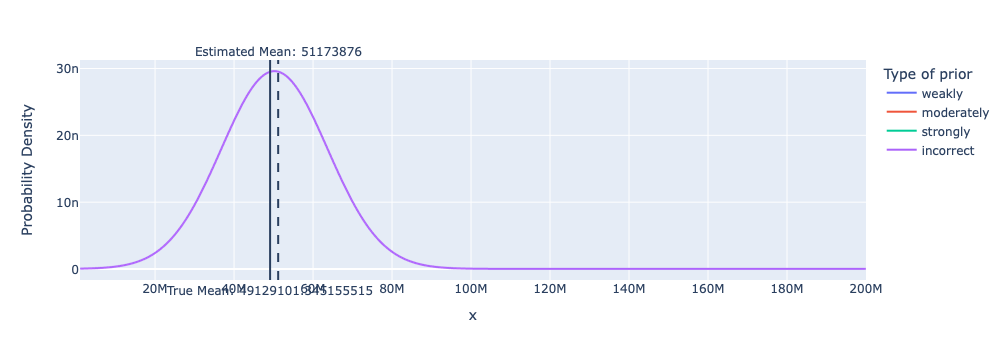

In [10]:
import pandas as pd
import plotly.express as px

posterior_pdf = pd.DataFrame({'x': x_values})
for prior, density_values in posterior_densities.items():
    posterior_pdf[prior] = density_values

posterior_pdf_melted = posterior_pdf.melt(id_vars='x', var_name="Type of prior")
fig = px.line(posterior_pdf_melted, x='x', y='value', color='Type of prior', labels={'value': 'Probability Density'})
fig.add_vline(x=true_mean, annotation_text=f'True Mean: {true_mean}', annotation_position='bottom')
fig.add_vline(x=mu_estim, line_dash='dash', annotation_text=f'Estimated Mean: {round(mu_estim)}', annotation_position='top')
fig.show()


**Exercise 2.** In the last exercise, we've built a Bayesian model in which we've assumed that the data is normally distributed. However, we've already seen in the previous classes that this is not the case. In this exercise, we'll investigate the effect of assuming a wrong distribution on the estimation.  

Calculate the values of the probability density of the posterior predictive distribution (remember: the *posterior distribution* is about the parameters, the *posterior predictive distribution* is about the data!). Using `fig4.add_scatter()`, draw the distributions over the histogram generated in the cell below. Inspect the quality of fit (use the zoom functionality of Plotly to zoom in the low-income part).  

We will check how this assumption influences the root mean squared error of the estimators. The RMSE for a sample of estimator values $\hat{\mu}_1, \dots, \hat{\mu_N}$ is given by the formula 

$$RMSE = \sqrt{\sum_{i=1}^N (\hat{\mu}_i - \mu)^2},$$
and is an approximation of the average error that we make on a single estimation.  

Estimate the root mean squared error (RMSE) of the frequentist estimator and bayesian estimators for two priors of your choice.
Compute arithmetic means and the means of the posterior distributions for 1000 independent samples of municipality incomes. Visualize them on histograms annotated with the true mean incomes. Compute the RMSE. Did the frequentist estimator outperform the Bayesian ones because of the improper assumption about the distribution of the data? Can you see the influence of the prior distribution on the distribution of the Bayesian estimator?

What is the posterior distribution of the mean and the Bayesian estimator in the case of a non-informative prior ($\sigma_0^{-2} = 0$)?

In [ ]:
fig4 = px.histogram(x=income2020, histnorm='probability density', nbins=601)
x = np.linspace(0, max(income2020), 1001)

## Write the rest of your code here. 

**Exercise 3.** In the previous classes, we saw that the distribution of the log-income resembles the normal distribution. This means that for the raw income, the [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution is probably a better fit than the normal one. The log-normal distribution $Y \sim log\mathcal{N}(\mu, \sigma^2)$ is defined as the natural exponent of a normally distributed variable $X \sim \mathcal{N}(\mu, \sigma^2)$, i.e. $Y = e^X$. It's probability density function is given by

$$f(y) = \frac{1}{y\sqrt{2\pi\sigma^2}}\exp\left( -\frac{(\ln(y) - \mu)^2}{2\sigma^2} \right).$$

In this exercise, we'll check how well the log-normal distribution fits the income data and whether a better-fitting distribution allows for a better estimation of the mean.  

First, check what is the distribution of the conjugate prior for the log-mean parameter $\mu$. Next, derive its posterior distribution. Remember to use the likelihood for the whole sample, not just a single data point.  

Now, we need to figure out how to estimate the mean income in this model. Note that the $\mu$ parameter in this case is the mean log-income (the mean value of $\ln (Y)$), which, as we've already seen in Notebook 4, is much different than the logarithm of the mean income: $e^\mu \neq \bar{Y}$. In order to estimate the mean value of the raw income, $\bar{Y}$, we can use the posterior predictive distribution. 

The posterior predictive distribution of $Y$ in our case (assuming you've found the correct conjugate prior) is equal to

$$Y^* \sim log\mathcal{N}(\mu_0', \sigma_0'^2 + \sigma^2),$$

where $\sigma^2$ is the true variance of the log-income (for simplicity, as in the previous exercises, we assume that it's equal to the variance estimated from the sample). Find the expected value of $Y^*$ (look for appropriate formulas for the log-normal distribution on Wikipedia) and use it to estimate the mean income.  

Compute the parameters for the following priors for the mean of the log-income (note that we're using *natural* logarithms in this exercise):   
1. 99% probability that the mean log-income is between 10 and 25
2. 99% probability that the mean log-income is between 12 and 20
3. 99% probability that the mean log-income is between 16 and 17
4. 99% probability that the mean log-income is between 18 and 19

Compute the posterior parameters for all four priors based on the random sample from Exercise 1. Visualize the densities of the posterior distributions on a plot and annotate it with the true value of the mean log-income and the frequentist estimate. Is there any difference compared to the posteriors from Exercise 1? Create a plot showing a selected prior and the corresponding posterior and interpret it in terms of how the data influenced the distribution of the parameter.   

Visualize the posterior predictive distributions for the four priors and compare them to the histogram of the data. Does this model fit better?

Estimate the RMSE of the estimators of the mean income $\bar{Y}$ for the weakly informative prior and the improper prior. Compare it to the RMSE values from the previous exercise. Which estimator works best? What is the effect of an improper prior when the probability distributions of the model are properly defined? 


In [ ]:
## Get the true mean and sd of log-incomes:
true_log_mu = np.log(income2020).mean()
true_log_sd = np.log(income2020).std()
## Get the estimates from a sample:
mu_log_estim = np.log(income_sample).mean()
sd_log_estim = np.log(income_sample).std()
print('True log-income mean:', round(true_log_mu, 4), 'with sd', round(true_log_sd, 4))
print('Estimated log-income mean:', round(mu_log_estim, 4), 'with sd', round(sd_log_estim, 4))

## Write the rest of your code here. 

True log-income mean: 16.788 with sd 1.0086
Estimated log-income mean: 16.9623 with sd 1.0638


<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>